In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns


In [2]:
#Import data
df = pd.read_csv('homicide_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [3]:
# Shape of the data frame
df.shape

(195, 6)

In [4]:
#Checking null values
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [5]:
#Checking the datatype
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [6]:
#Changing the data types
datatype_list = ['Rate','Count','Year']
for i in datatype_list:
    print(i)
    if (i == 'Rate'):
        df[i] = df[i].astype(float)
    else:
        df[i] = df[i].astype(int)
#Checking results
df.dtypes

Rate
Count
Year


Location      object
Region        object
Subregion     object
Rate         float64
Count          int32
Year           int32
dtype: object

In [7]:
#Changing the name of Americas in the column Region
df['Region'].replace('Americas', 'North and South America', inplace=True) 

In [8]:
#Saving by the most count
df1 = df.sort_values(by='Count', ascending=False).reset_index(drop=True).head()
df2 = df[['Location','Count']].sort_values(by='Count', ascending=False).reset_index(drop=True).head()
df1 = df2
df1

,Location,Count
0,Brazil,47722
1,Nigeria,44200
2,India,40651
3,Mexico,36579
4,United States,21570


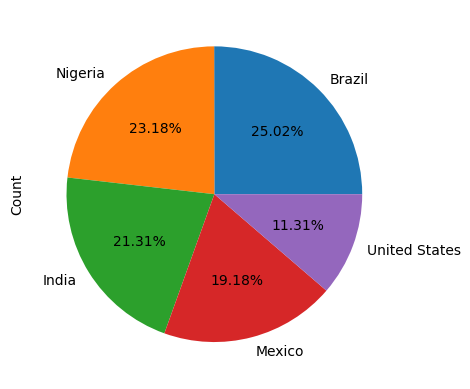

In [9]:
#Visualization by the most Count
df1.plot(x='Location', y='Count', kind='pie', labels = df1['Location'], autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [10]:
#Grouping by region and saving it
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending=False)
df2

Region
North and South America    153597
Asia                       105552
Africa                      99481
Europe                      19869
Oceania                       347
Name: Count, dtype: int32

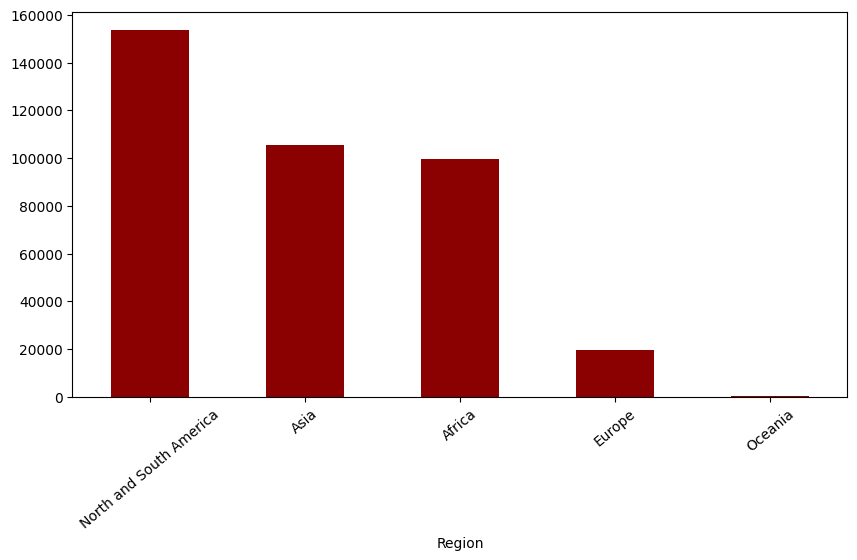

In [11]:
#Visualization
df2.plot(kind='bar', color='darkred', figsize=(10,5))
plt.xticks(rotation=40)
plt.show()

In [12]:
#Grouping by subregion
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

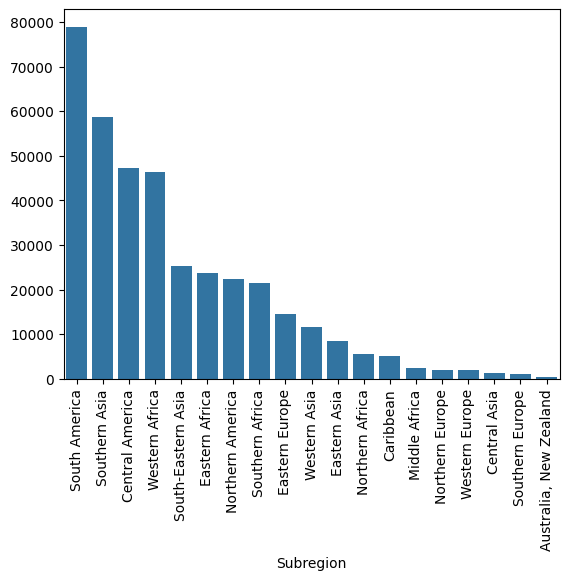

In [13]:
#Visualization
sns.barplot(x=df3.index, y=df3.values)
plt.xticks(rotation=90)
plt.show()

In [14]:
#Times each year comes up in the data frame
df['Year'].value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [15]:
#Only Europe or Asia and greater than 2016
df4 = df[df['Region'].isin(['Europe','Asia'])]
df4 = df4.query('Year > 2016')[['Region','Year','Count']]

In [16]:
#Grouping by Region and Year
df4 = df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int32

In [17]:
#Unstacked
df_unstacked = df4.unstack(level=0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [18]:
#Convert the type of the index year
df_unstacked.index = df_unstacked.index.astype(int).astype(str)


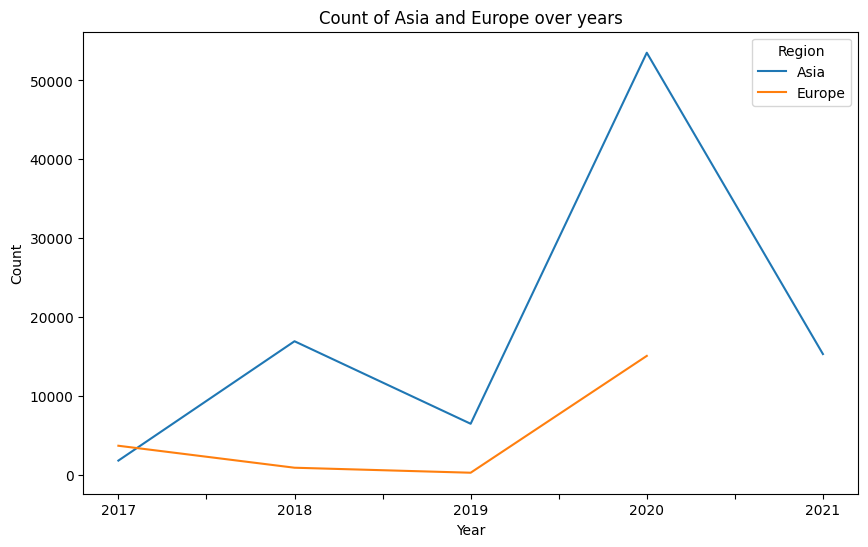

In [19]:
#Visualization
df_unstacked.plot(kind='line', figsize=(10,6))
plt.title('Count of Asia and Europe over years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [20]:
#Group the DataFrame df by the 'Year' column, sum the 'Rate' 
df5 = df.groupby('Year')['Rate'].sum().sort_values(ascending=False)
df5

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

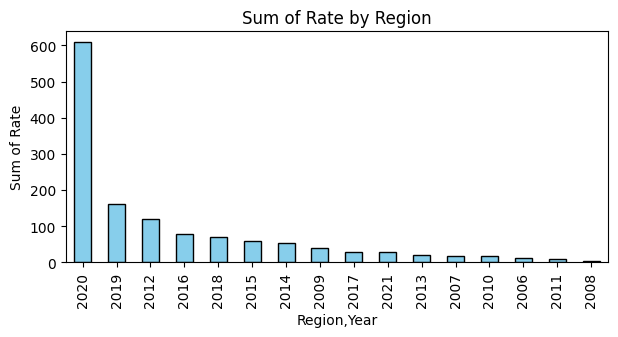

In [21]:
#Visualization
df5.plot(kind='bar', figsize=(7,3), color='skyblue', edgecolor = 'black')
plt.title('Sum of Rate by Region')
plt.xlabel('Region,Year')
plt.ylabel('Sum of Rate')
plt.show()

In [22]:
#Extract  the 'Year', 'Region', and 'Count' columns from the DataFrame df, groups the result by 'Year' and 'Region' and visualize using bar plots 
df6 = df[['Year','Region','Count']]
df6= df6.groupby(['Year','Region']).sum().sort_values(by='Year', ascending=False).head(40)
df6

Count
Year Region                         
2021 Asia                      15299
2020 Oceania                     221
     North and South America  134784
     Europe                    15066
     Asia                      53516
     Africa                    28460
2019 Europe                      249
     Africa                    44210
     Asia                       6458
     North and South America    4276
     Oceania                     126
2018 North and South America   13793
     Europe                      883
     Asia                      16923
2017 Europe                     3670
     Asia                       1787
     Africa                     1467
2016 Asia                        627
     North and South America     608
     Europe                        0
     Africa                     4987
2015 Asia                        241
     Africa                     2206
     Europe                        0
2014 North and South America      13
     Asia                       3029
2013 Asia                       5782
2012 Africa                    15264
     North and South America      53
     Asia                         61
2011 Asia                       1626
     Africa                      855
     Europe                        0
2010 Europe                        1
     Africa                      303
2009 North and South America      42
     Africa                       27
2008 Africa                     1702
2007 North and South America      26
2006 North and South America       2

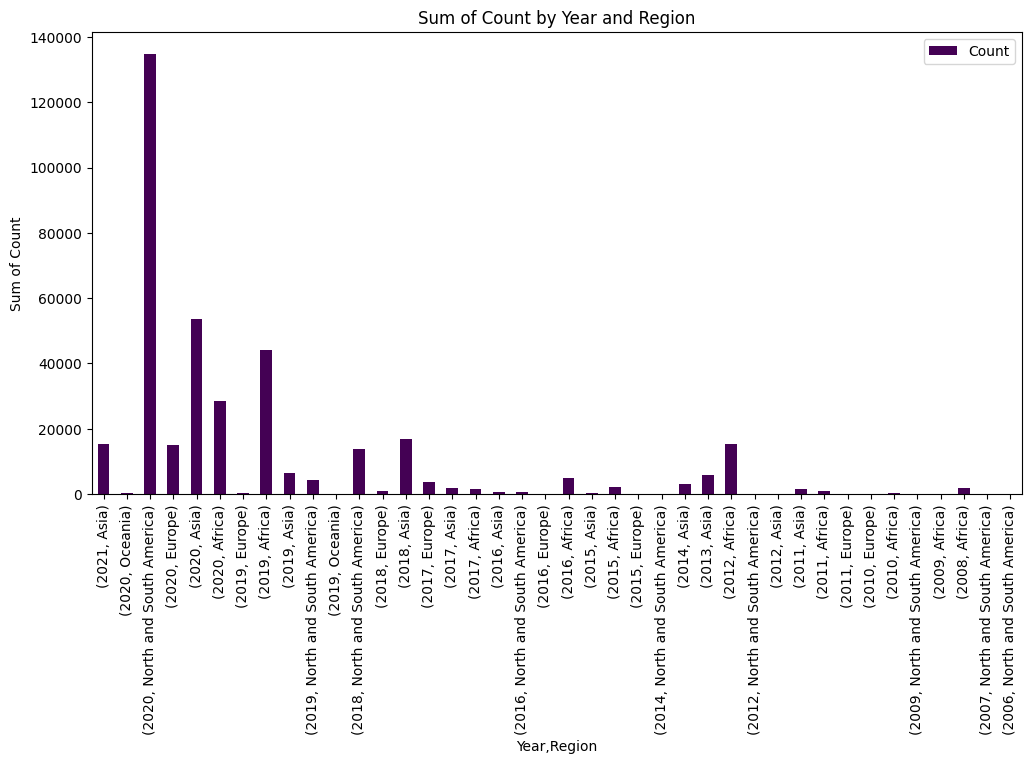

In [23]:
#Visualization
df6.plot(kind='bar', figsize=(12,6),colormap='viridis')
plt.title('Sum of Count by Year and Region')
plt.xlabel('Year,Region')
plt.ylabel('Sum of Count')
plt.show()


In [24]:
#Group the DataFrame df by the 'Subregion' column, sum the 'Count' values within each group and visualize it on treemap
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending=False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64